# Lab 5 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [1]:
'''
    Your answer: 
    The derivation of Adaboost as a forward stage-wise additive model starts by assuming that the classifiers
    will give -1, 1 (by considering the exponential loss function.) Nonetheless, with the algorithm derivied the
    only thing that depends on the the class labes is the voting scheme. 

    The original voting scheme uses the sign of the summation to decide whether the alphas for the weak classifiers
    voting for the first class is greater than the sum of the alphas of the weak classifiers voting for the second
    class. In the slides however we covered a different formulation that checks for the same thing regardless to what
    labels we use for the classes.
'''

'\n    Your answer: \n    The derivation of Adaboost as a forward stage-wise additive model starts by assuming that the classifiers\n    will give -1, 1 (by considering the exponential loss function.) Nonetheless, with the algorithm derivied the\n    only thing that depends on the the class labes is the voting scheme. \n\n    The original voting scheme uses the sign of the summation to decide whether the alphas for the weak classifiers\n    voting for the first class is greater than the sum of the alphas of the weak classifiers voting for the second\n    class. In the slides however we covered a different formulation that checks for the same thing regardless to what\n    labels we use for the classes.\n'

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **X_test**| The input features for the testing set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [2]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

from utils import get_accuracy, get_error_rate, print_accuracy, plot_accuracy

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### DONE: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

An interesting formula, perhaps. Suppose we have two classes (k=2), the class is either the first or the second depending on which yields the greater sum (in each sum we only look at the classifiers that agree with the result.)


**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [3]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):      
    # T is the no. of iterations.
    # clf is the weak classifier
    
    #DONE: FILL THE FUNCTION with the implementation as the steps above

    # DONE [1]: Initialize weights      
    w = np.array([1/len(X_train) for x in X_train ])            # for e

    ## DONE [2]:  Initialize the training and test predicted classes with empty array placeholders
    #### Hint: what should be their shape?      ## Like Y_train and Y_test respectively
    pred_train = np.zeros((T,len(Y_train) ))         ## predicted classes of the training examples
    pred_test = np.zeros((T,len(Y_test) ))          ## predicted classes of the test examples

    ## DONE [3]: loop over the boosting iterations 
    for t in range(T): 

        # DONE [4]: Fit a classifier with the specific weights 
        ## DONE [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        clf = clf.fit(X_train,Y_train, w)
        
        # DONE [4.B]: predict classes for the training data and test data
        pred_train_t = clf.predict(X_train)
        pred_test_t = clf.predict(X_test)
        
        # DONE [5]: calculate the miss Indicator function
        I = (pred_train_t != Y_train)             #Assuming Y_test is a numpy array like pred_test_t
        
        # DONE [6]: calculate the error for the current classifier (err_t)
        err_t = np.sum(w * I)/np.sum(w)
        
        # DONE [7]: calculate current classifier weight (Alpha_t)
        alpha_t = np.log((1-err_t)/err_t)
        
        # DONE [8]: update the weights 
        w = w * np.exp(alpha_t * I)             # a lot of cool vectorization is going on here.
        
        # DONE [9] Add to the overall predictions
        pred_train[t] = pred_train_t * alpha_t
        pred_test[t] = pred_test_t * alpha_t

    # Now pred_train is an array of t rows with predictions scaled by alpha as the formula suggested.
    # Need to add all these and come up with one row for the classification results
    # We will use the voting scheme that relies on the sign since classes are -1 and +1

    final_pred_train = np.sum(pred_train, axis=0)
    final_pred_test = np.sum(pred_test, axis=0)

    # apply the sign function on all of them:
    final_pred_train[final_pred_train >= 0], final_pred_train[final_pred_train < 0]= 1, -1
    final_pred_test[final_pred_test >= 0], final_pred_test[final_pred_test < 0]= 1, -1


    # DONE [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py
    train_acc = get_accuracy(final_pred_train, Y_train )
    test_acc = get_accuracy(final_pred_test, Y_test )
    print_accuracy(train_acc, test_acc)
    return train_acc, test_acc



### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Accuracy: Training: 66.96875% - Test: 66.33333333333333%
Number of Iterations :  60
Accuracy: Training: 83.11458333333334% - Test: 82.16666666666667%
Number of Iterations :  110
Accuracy: Training: 86.75% - Test: 84.375%
Number of Iterations :  160
Accuracy: Training: 88.55208333333333% - Test: 87.04166666666666%
Number of Iterations :  210
Accuracy: Training: 89.84375% - Test: 88.625%
Number of Iterations :  260
Accuracy: Training: 90.10416666666666% - Test: 88.0%
Number of Iterations :  310
Accuracy: Training: 91.75% - Test: 89.83333333333333%
Number of Iterations :  360
Accuracy: Training: 92.05208333333333% - Test: 90.70833333333333%


/Users/essam/Documents/GitHub/ML-Labs/Lab 5 - AdaBoost Classifier/utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


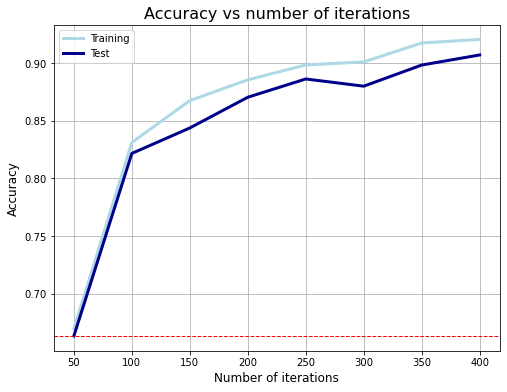

In [4]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)

train, test = np.array(train), np.array(test)
# For some reason pandas loops on columns when doing list comprehension unless [0] is specified.
# Not cool --> switch to Numpy and even get rid of iloc.

# print(train.shape) (9600, 11) 10 features and last column is for class
# print(train.iloc[1:10, 10])   it takes values -1, 1

X_train, Y_train = train[:, :-1], train[:, -1]            # last column should to go to classes (Y_train)
X_test, Y_test = test[:, :-1], test[:, -1]                # last column should go to classes (Y_test)

# X_Train is now of dimensions (9600, 10) and Y_train is of dimensions (9600,) for test sets its 2400 rows (20%)

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)      
# random_state: a sub-optimal greedy algorithm is repeated a number of times using random selections of features and samples
# here we give it a seed of 1 so results are always consistent.
# max_depth = 1 means it's always one split. (very week classifier)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [5]:
'''
    Your answer:
    It's increasing. There is a drastic decrease in slope starting from 100 iterations.
    Going further the slope keeps decreasing until it becomes about 0 starting form 350 iterations.

    The accuracy keeps on improving with iterations because in each iteration the classifier learns from its mistakes
    in the previous iteration  and is then weighted depending on the new resulting loss it computes (the smaller it is
    the larger the weight) hence, accuracy should naturally increase with iterations (every iteration is more learning.)

    Now as we can see, at some point it starts to decrease then flatten out which means that there is less to learn
    every iteration (at the beginning with 65 percent accuracy it had much to learn.) so its also natural for the 
    accuracy improvement to slow down as we go. 

    Side note:
    One would assume that more iterations may lead to overfitting (it turns out to be more robust than expected):
    "As shown in L2Boost by Peter Bühlmann, as the number of weak learners (rounds of boosting) increases, 
    the bias converges exponentially fast while the variance increases by geometrically diminishing magnitudes 
    which means: It overfits much slower than most of the other methods."
    https://stats.stackexchange.com/questions/20622/is-adaboost-less-or-more-prone-to-overfitting
'''

'\n    Your answer:\n    It\'s increasing. There is a drastic decrease in slope starting from 100 iterations.\n    Going further the slope keeps decreasing until it becomes about 0 starting form 350 iterations.\n\n    The accuracy keeps on improving with iterations because in each iteration the classifier learns from its mistakes\n    in the previous iteration  and is then weighted depending on the new resulting loss it computes (the smaller it is\n    the larger the weight) hence, accuracy should naturally increase with iterations (every iteration is more learning.)\n\n    Now as we can see, at some point it starts to decrease then flatten out which means that there is less to learn\n    every iteration (at the beginning with 65 percent accuracy it had much to learn.) so its also natural for the \n    accuracy improvement to slow down as we go. \n\n    Side note:\n    One would assume that more iterations may lead to overfitting (it turns out to be more robust than expected):\n    "As

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [6]:
'''
    Your answer:
    https://stats.stackexchange.com/questions/163560/how-many-adaboost-iterations
    "Mease and Wyner (2008) argue that AdaBoost should be run for a long time, until it converges, 
    and that 1,000 iterations should be enough."
    So assuming speed is not issue we can run it a large number of iterations without worrying (e.g. 1K as by Mease et al)    
    
    The elbow method is often used to select the number of clusters in k-means, we keep watching the loss function
    as it decreases with the number of clusters and stop at the 'elbow of the curve' (knee here). We can apply the same huerstic
    to find the number of iterations here.  Stopping there makes sense because we don't get so much from continuing and we make
    the model (even if its a special case here) more susceptible to overfitting all while paying the same amount
    of resources (computationa and time.)
'''

'\n    Your answer:\n    https://stats.stackexchange.com/questions/163560/how-many-adaboost-iterations\n    "Mease and Wyner (2008) argue that AdaBoost should be run for a long time, until it converges, \n    and that 1,000 iterations should be enough."\n    So assuming speed is not issue we can run it a large number of iterations without worrying (e.g. 1K as by Mease et al)    \n    \n    The elbow method is often used to select the number of clusters in k-means, we keep watching the loss function\n    as it decreases with the number of clusters and stop at the \'elbow of the curve\'. We can apply the same huerstic\n    to find the number of iterations here. The only different is the the elbow here is more like a \'knee\' (since \n    we\'re plotting accuracy.) stopping there makes sense because we don\'t get so much from continuing and we make\n    the model (even if its a special case here) more susceptible to overfitting all while paying the same amount\n    of resources (computati